In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils

In [3]:
def _plot_S(ax1, ax2, dataset_name, in_subplot=True):
    print(dataset_name)
    db_name = 'DB_{}'.format(dataset_name)
    key_name_in_DB = 'constraints'
    dfc = db_utils.load_data(db_name, key_name_in_DB)
    dfc = dfc.loc[:, dfc.columns != 'reproduce_seed']
    
    # only work with `n_constraints > 5`
    dfc = dfc[dfc.n_constraints > 5]
    
    # group by perplexity
    dfc2 = dfc.groupby('perp')
    
    # calculate statistical info
    summary_by_perp = dfc2.agg(['mean', 'std', 'min', 'max', 'count'])
    
    # get values for `S_all`, `S_M` and `S_C`
    perps = summary_by_perp.index.tolist()
    s_all_means = dfc2.s_all.mean().get_values()
    s_all_errors = dfc2.s_all.std().get_values()
    s_ml_means = dfc2.s_ml.mean().get_values()
    s_cl_means = dfc2.s_cl.mean().get_values()
    
    # print(dataset_name, perps.shape, s_all_means.shape, s_all_errors.shape,
    #     s_ml_means.shape, s_cl_means.shape)
    
    # plot to individual file or plot to subplot
    _plot_constraint_scores(ax1, ax2, perps,
                            s_all_means, s_all_errors, s_ml_means, s_cl_means,
                            dataset_name, in_subplot)

In [4]:
from matplotlib.ticker import FuncFormatter

def exp_format(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return int(np.exp(x))

In [10]:
def _plot_constraint_scores(ax1, ax2, perps,
                            s_all_means, s_all_errors, s_ml_means, s_cl_means,
                            dataset_name, in_subplot=True):
    x_axis = np.log(perps).tolist()
    print('Number of perplexity: ', len(x_axis))
    # ax1.axes.set_ylim(-1,5)
    
    # plot `s_all_means` with error region in the subplot defined by `ax1`
    line1, = ax1.plot(x_axis, s_all_means, '-*', linewidth=0.5, markevery=[0], color='#ff9900', label='$S_{\mathcal{M}+\mathcal{C}}$')
    # ax.errorbar(np.log(x_axis), mean_vals, yerr=error_vals)
#     ax1.fill_between(x_axis, s_all_means - s_all_errors, s_all_means + s_all_errors,
#                    alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848', linewidth=0.8,
#                    interpolate=True, antialiased=True)
#     ax1.set_ylabel('$S_{\mathcal{M}+\mathcal{C}}$')
    ax1.spines['bottom'].set_visible(False)
    ax1.legend(handles=[line1], loc='lower center')

    # plot `s_ml_means` and `s_cl_means` in the same subplot defined by `ax2`
    line2, = ax2.plot(x_axis, s_ml_means, '-o', color='#3366cc',
                      linewidth=0.5, markevery=[0], label='$S_{\mathcal{M}}$')
#     ax2.set_ylabel('$S_{\mathcal{M}}$', color='b')
    ax2.tick_params('y', colors='#3366cc') # rotation=90
#     ax2.locator_params(nbins=5, axis='y')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    ax3 = ax2.twinx()
    line3, = ax3.plot(x_axis, s_cl_means, '-s', color='#dc3912',
                      linewidth=0.5, markevery=[0], label='$S_{\mathcal{C}}$')
    # ax3.set_ylabel('$S_{\mathcal{C}}$', color='r')
    ax3.tick_params('y', colors='#dc3912') # rotation=90
#     ax3.locator_params(nbins=5, axis='y')
#     ax3.spines['top'].set_visible(False)
    ax3.spines['top'].set_linewidth(0.1)
    ax3.legend(handles=[line2, line3], loc='lower center', ncol=2)

    # ax1.grid(True)
    # ax2.grid(True)
    ax1.yaxis.grid(True, linestyle='--')
    ax2.yaxis.grid(True, linestyle='--')
    ax2.set_xlabel('Perplexity in log scale')
    ax3.xaxis.set_major_formatter(FuncFormatter(exp_format))

    # custom layout if plotting for only one dataset
    if in_subplot:
        ax1.set_title(dataset_name)
    else:
        plt.suptitle('$S_{\mathcal{M}+\mathcal{C}}, S_{\mathcal{M}}$ and $S_{\mathcal{C}}$ '+
                     'for {}'.format(dataset_name), y=1.05)
        plt.tight_layout()
        plt.subplots_adjust(hspace=0)
        plt.savefig('./plots/[{}]constraint_scores.pdf'.format(dataset_name))

MNIST-SMALL
Number of perplexity:  898
COIL20
Number of perplexity:  720
COUNTRY-2014
Number of perplexity:  500
BREAST-CANCER95
Number of perplexity:  500
MPI
Number of perplexity:  500
DIABETES
Number of perplexity:  500


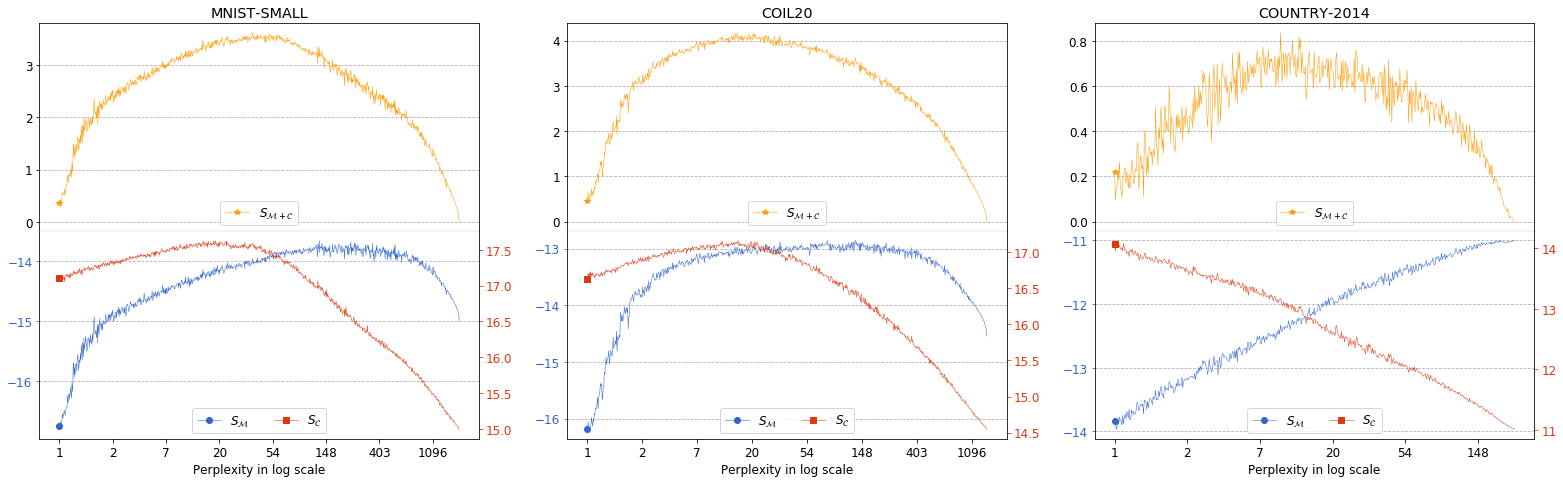

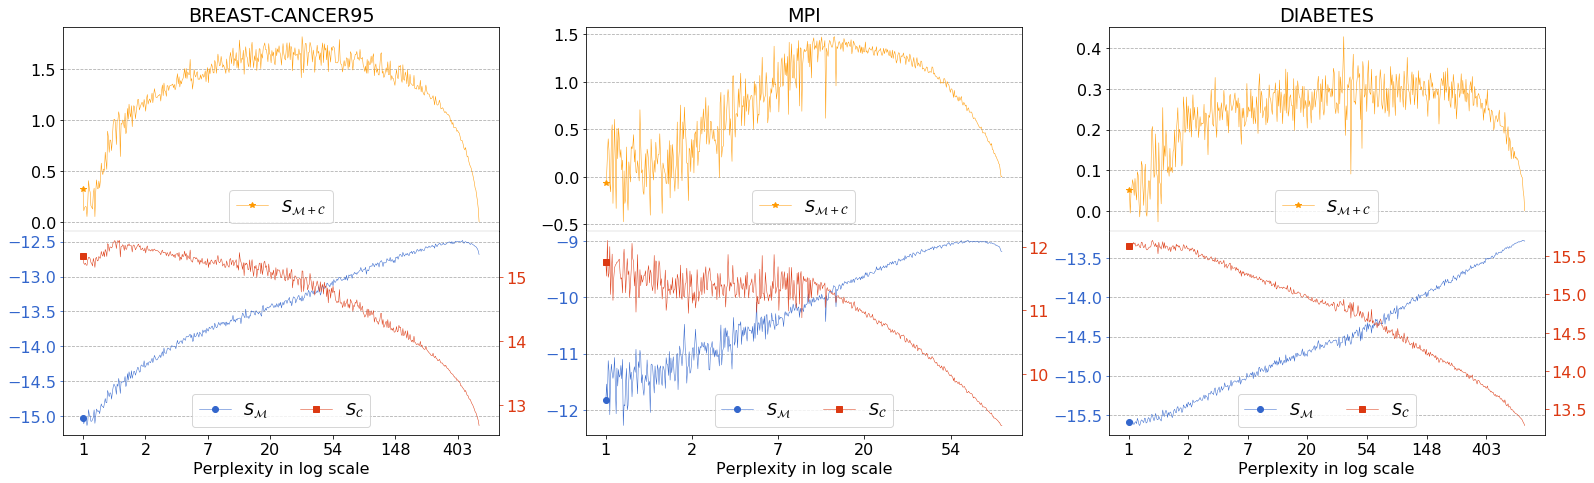

In [11]:
list_datasets = [
    ['MNIST-SMALL',
    'COIL20',
    'COUNTRY-2014'],
    ['BREAST-CANCER95',
    'MPI',
    'DIABETES']
]

for idx, datasets in enumerate(list_datasets):
    fig, axes = plt.subplots(2, len(datasets), figsize=(22, 7))

    for i, dataset_name in enumerate(datasets):
        ax1, ax2 = axes[0][i], axes[1][i]
        _plot_S(ax1, ax2, dataset_name, in_subplot=True)

    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0.2)
    # plt.suptitle('$S_{\mathcal{M}+\mathcal{C}}, S_{\mathcal{M}}$ and $S_{\mathcal{C}}$ for all datasets', y=1.05)
    plt.savefig('./plots/constraint_scores{}.pdf'.format(idx+1))

#### Some small notes:
+ $S$ is always small for _very small_ and _very large_ perplexity.
+ $S$ is smooth enough for some datasets but not all. (because of the natural of each dataset, or **my fauts in pre-processing step**)

MNIST-SMALL
Number of perplexity:  898
COIL20
Number of perplexity:  720
COUNTRY-2014
Number of perplexity:  500
BREAST-CANCER95
Number of perplexity:  500
MPI
Number of perplexity:  500
DIABETES
Number of perplexity:  500


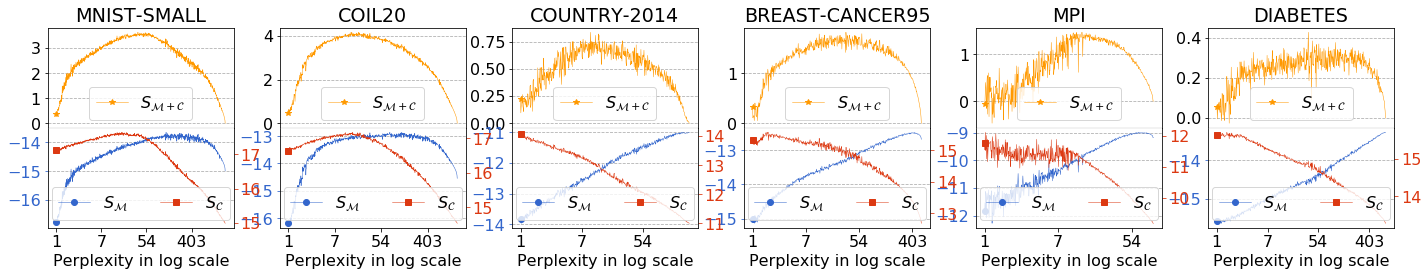

In [12]:
datasets = [
    'MNIST-SMALL',
    'COIL20',
    'COUNTRY-2014',
    'BREAST-CANCER95',
    'MPI',
    'DIABETES'
]

fig, axes = plt.subplots(2, len(datasets), figsize=(20, 4))

for i, dataset_name in enumerate(datasets):
    ax1, ax2 = axes[0][i], axes[1][i]
    _plot_S(ax1, ax2, dataset_name, in_subplot=True)

plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0.25)
# plt.suptitle('$S_{\mathcal{M}+\mathcal{C}}, S_{\mathcal{M}}$ and $S_{\mathcal{C}}$ for all datasets', y=1.05)
# plt.savefig('./plots/constraint_scores{}.pdf'.format(idx+1))

MNIST-SMALL
Number of perplexity:  898


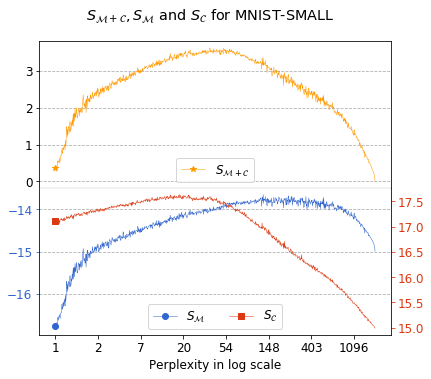

In [13]:
fig, axes = plt.subplots(2,1, figsize=(6,5))
dataset_name = 'MNIST-SMALL'
_plot_S(axes[0], axes[1], dataset_name, in_subplot=False)
plt.savefig('./plots/s_scores.pdf')